Correlation Analysis
To understand the relationships between different health indicators, we will create a correlation heatmap for each dataset.
Descriptive Analysis: Explored the dataset to understand the underlying patterns and trends.
Data Visualizations: Created insightful visualizations to represent key relationships in the data.

In [4]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# #Load DataSet
# brfss = pd.read_csv(f'C:\Github\Diabetes\Diabetes\Data\diabetes_012_health_indicators_BRFSS2015.csv')
# brfss.info
# Load the datasets
df_012 = pd.read_csv('C:\Github\Diabetes\Diabetes\Data\diabetes_012_health_indicators_BRFSS2015.csv')
df_binary = pd.read_csv('C:\Github\Diabetes\Diabetes\Data\diabetes_binary_health_indicators_BRFSS2015.csv')
df_5050 = pd.read_csv('C:\Github\Diabetes\Diabetes\Data\diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Display the first few rows of each dataset
df_012.head(), df_binary.head(), df_5050.head()

(   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
 0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

In [6]:
# Display basic information and summary statistics
df_012.info(), df_012.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(None,
         Diabetes_012         HighBP       HighChol      CholCheck  \
 count  253680.000000  253680.000000  253680.000000  253680.000000   
 mean        0.296921       0.429001       0.424121       0.962670   
 std         0.698160       0.494934       0.494210       0.189571   
 min         0.000000       0.000000       0.000000       0.000000   
 25%         0.000000       0.000000       0.000000       1.000000   
 50%         0.000000       0.000000       0.000000       1.000000   
 75%         0.000000       1.000000       1.000000       1.000000   
 max         2.000000       1.000000       1.000000       1.000000   
 
                  BMI         Smoker         Stroke  HeartDiseaseorAttack  \
 count  253680.000000  253680.000000  253680.000000         253680.000000   
 mean       28.382364       0.443169       0.040571              0.094186   
 std         6.608694       0.496761       0.197294              0.292087   
 min        12.000000       0.000000       0.000000  

In [7]:
df_binary.info(), df_binary.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(None,
        Diabetes_binary         HighBP       HighChol      CholCheck  \
 count    253680.000000  253680.000000  253680.000000  253680.000000   
 mean          0.139333       0.429001       0.424121       0.962670   
 std           0.346294       0.494934       0.494210       0.189571   
 min           0.000000       0.000000       0.000000       0.000000   
 25%           0.000000       0.000000       0.000000       1.000000   
 50%           0.000000       0.000000       0.000000       1.000000   
 75%           0.000000       1.000000       1.000000       1.000000   
 max           1.000000       1.000000       1.000000       1.000000   
 
                  BMI         Smoker         Stroke  HeartDiseaseorAttack  \
 count  253680.000000  253680.000000  253680.000000         253680.000000   
 mean       28.382364       0.443169       0.040571              0.094186   
 std         6.608694       0.496761       0.197294              0.292087   
 min        12.000000       0.00000

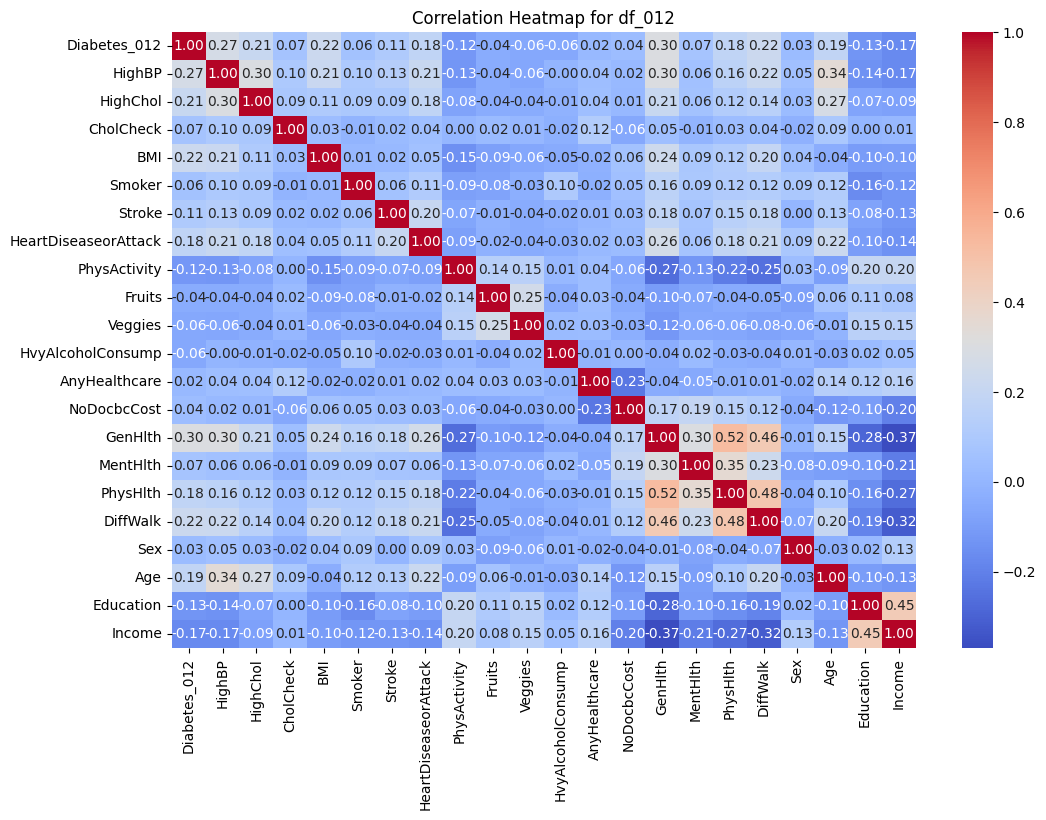

In [8]:
# Correlation heatmap for df_012
numeric_df_012 = df_012.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df_012.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for df_012')
plt.show()

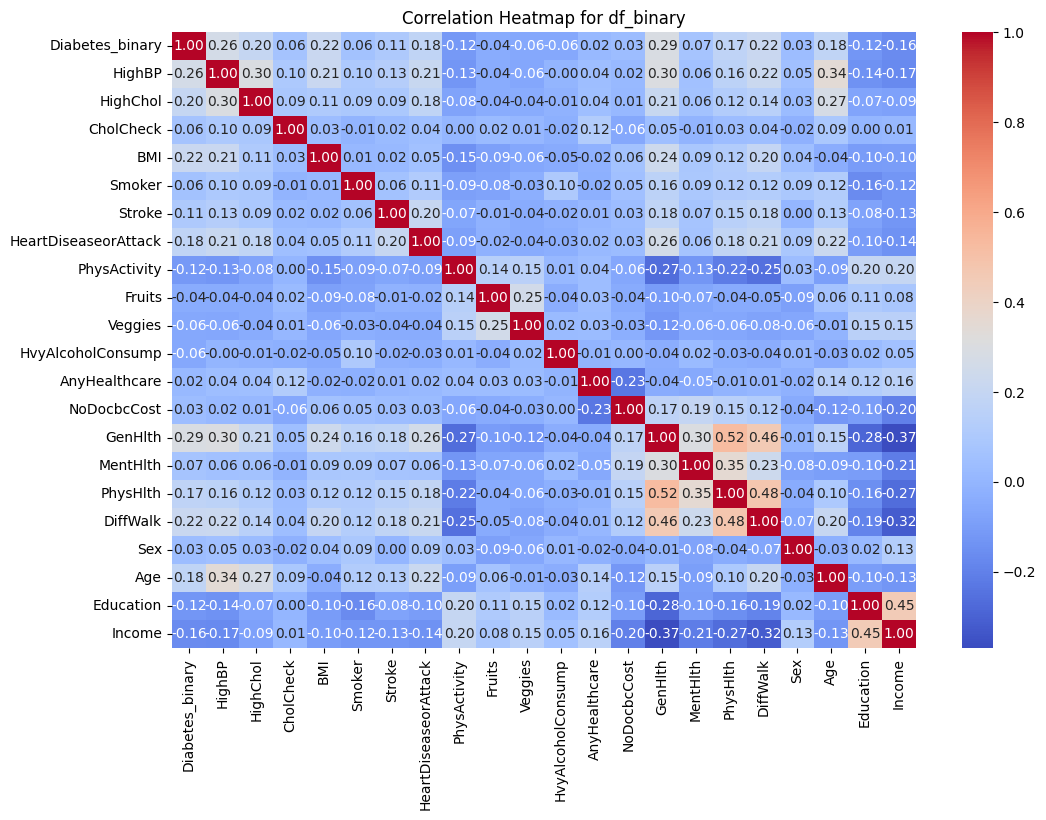

In [7]:
# Correlation heatmap for df_binary
numeric_df_binary = df_binary.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df_binary.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for df_binary')
plt.show()

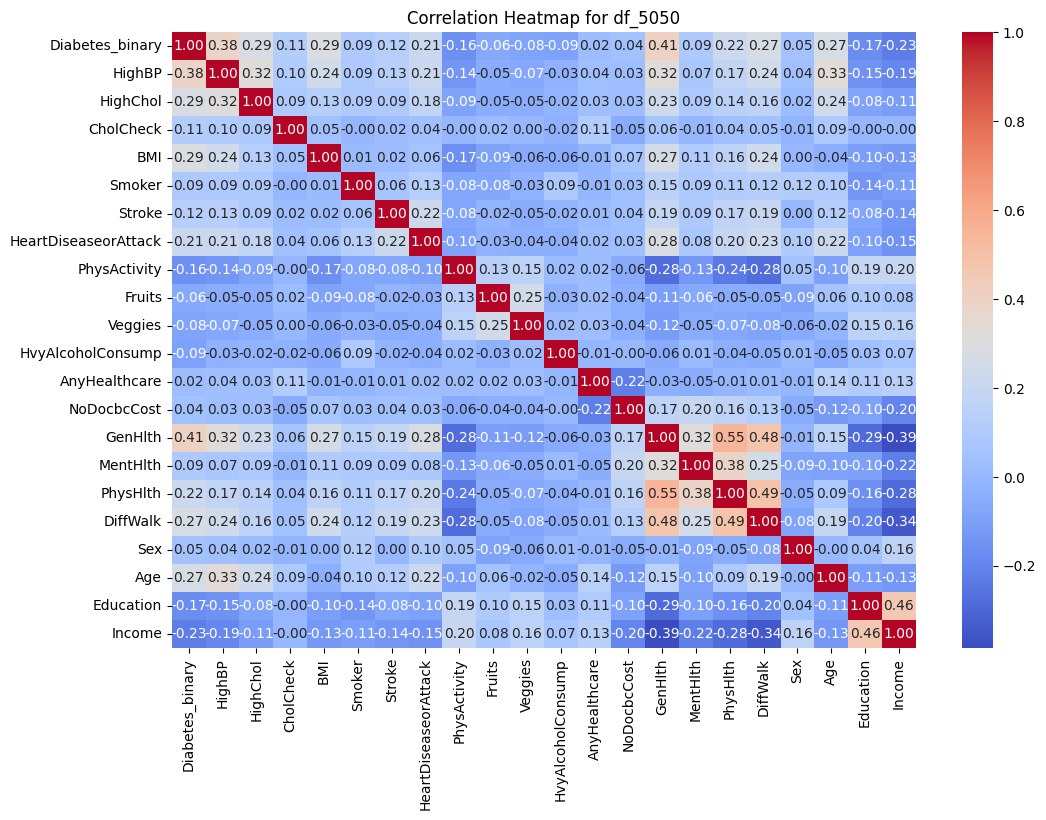

In [9]:
# Correlation heatmap for df_5050
numeric_df_5050 = df_5050.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df_5050.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for df_5050')
plt.show()

EDA

In [14]:
data = df_binary
data['Diabetes'] = data['Diabetes_binary']
# data = df_012
# data = df_5050

In [15]:
data_male = data[(data['Sex'] == 1)&(data['Diabetes'] == 1)]
data_male.count()

Diabetes_binary         16935
HighBP                  16935
HighChol                16935
CholCheck               16935
BMI                     16935
Smoker                  16935
Stroke                  16935
HeartDiseaseorAttack    16935
PhysActivity            16935
Fruits                  16935
Veggies                 16935
HvyAlcoholConsump       16935
AnyHealthcare           16935
NoDocbcCost             16935
GenHlth                 16935
MentHlth                16935
PhysHlth                16935
DiffWalk                16935
Sex                     16935
Age                     16935
Education               16935
Income                  16935
Diabetes                16935
dtype: int64

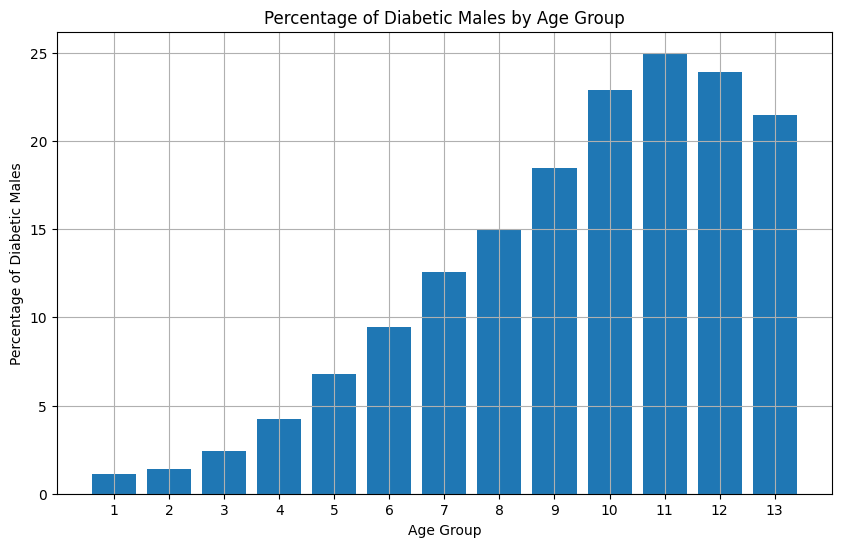

Maximum percentage of diabetic males is 24.95% at age group 11.


In [17]:
# frequency of diabetics of all ages for male

data_male = data[data['Sex'] == 1]
male_diabetic_by_age = data_male.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(male_diabetic_by_age['Age'], male_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Age Group')
plt.ylabel('Percentage of Diabetic Males')
plt.title('Percentage of Diabetic Males by Age Group')
plt.xticks(male_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = male_diabetic_by_age.loc[male_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic males is {:.2f}% at age group {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))

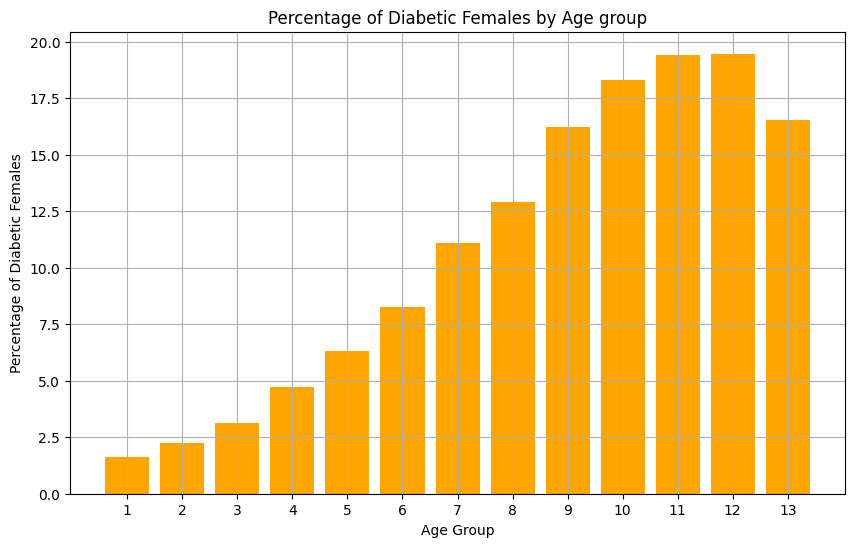

Maximum percentage of diabetic females is 19.47% at age group 12.


In [19]:
# frequency of diabetics of all ages for female

data_female = data[data['Sex'] == 0]
female_diabetic_by_age = data_female.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(female_diabetic_by_age['Age'], female_diabetic_by_age['Diabetes'] * 100, color = 'orange')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Diabetic Females')
plt.title('Percentage of Diabetic Females by Age group')
plt.xticks(female_diabetic_by_age ['Age'])
plt.grid(True)
plt.show()

max_percent_age = female_diabetic_by_age.loc[female_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic females is {:.2f}% at age group {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))

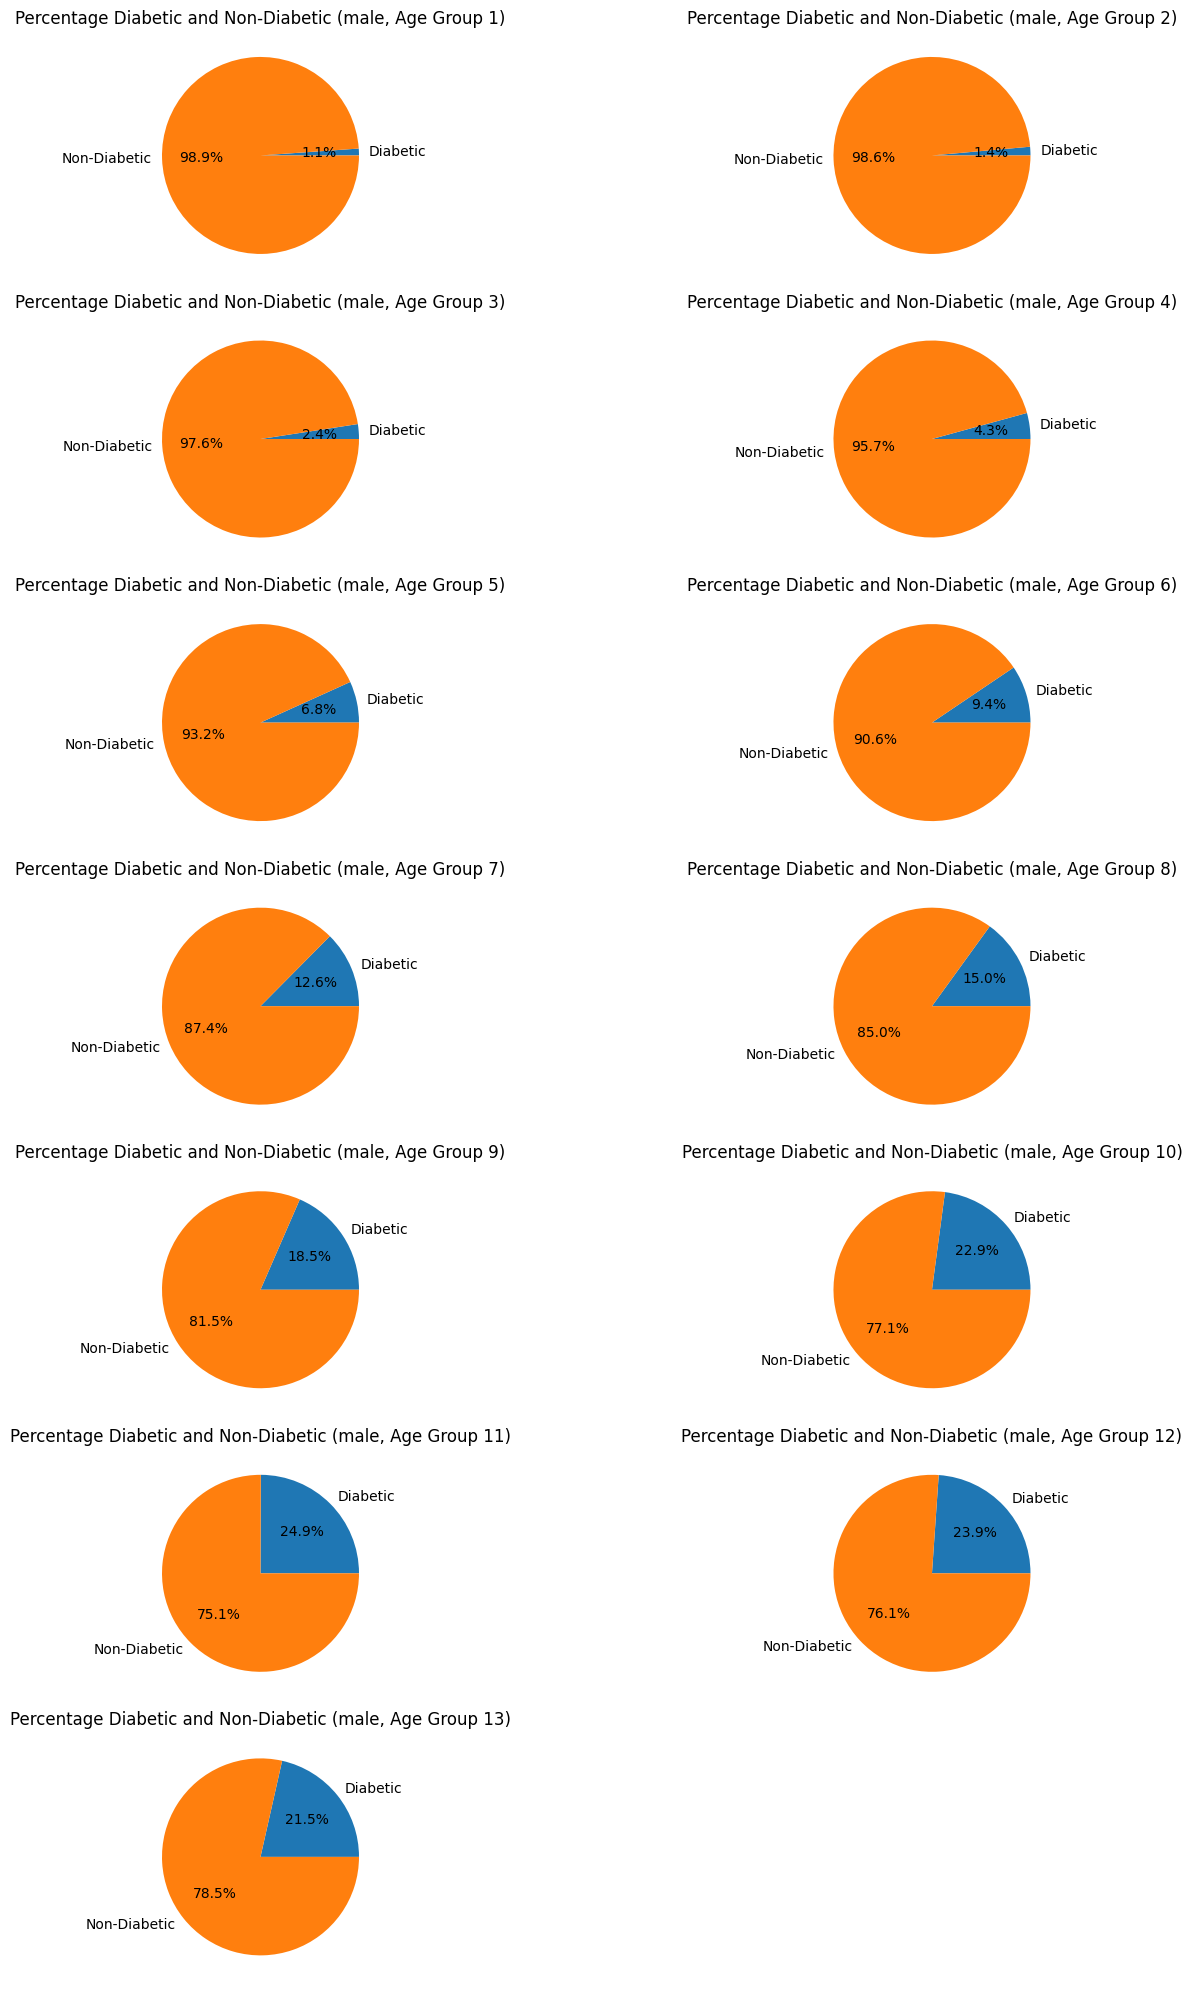

In [21]:
# percentage of diabetics and nondiabetics for male in range of all ages

plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_male = data[(data['Sex'] == 1) & (data['Age'] == age)]
    total_male = len(df_male)
    diabetic_male = len(df_male[df_male['Diabetes'] == 1])
    non_diabetic_male = len(df_male[df_male['Diabetes'] == 0])
    plt.pie([diabetic_male, non_diabetic_male], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
    plt.title(f'Percentage Diabetic and Non-Diabetic (male, Age Group {age})')
plt.tight_layout()
plt.show()

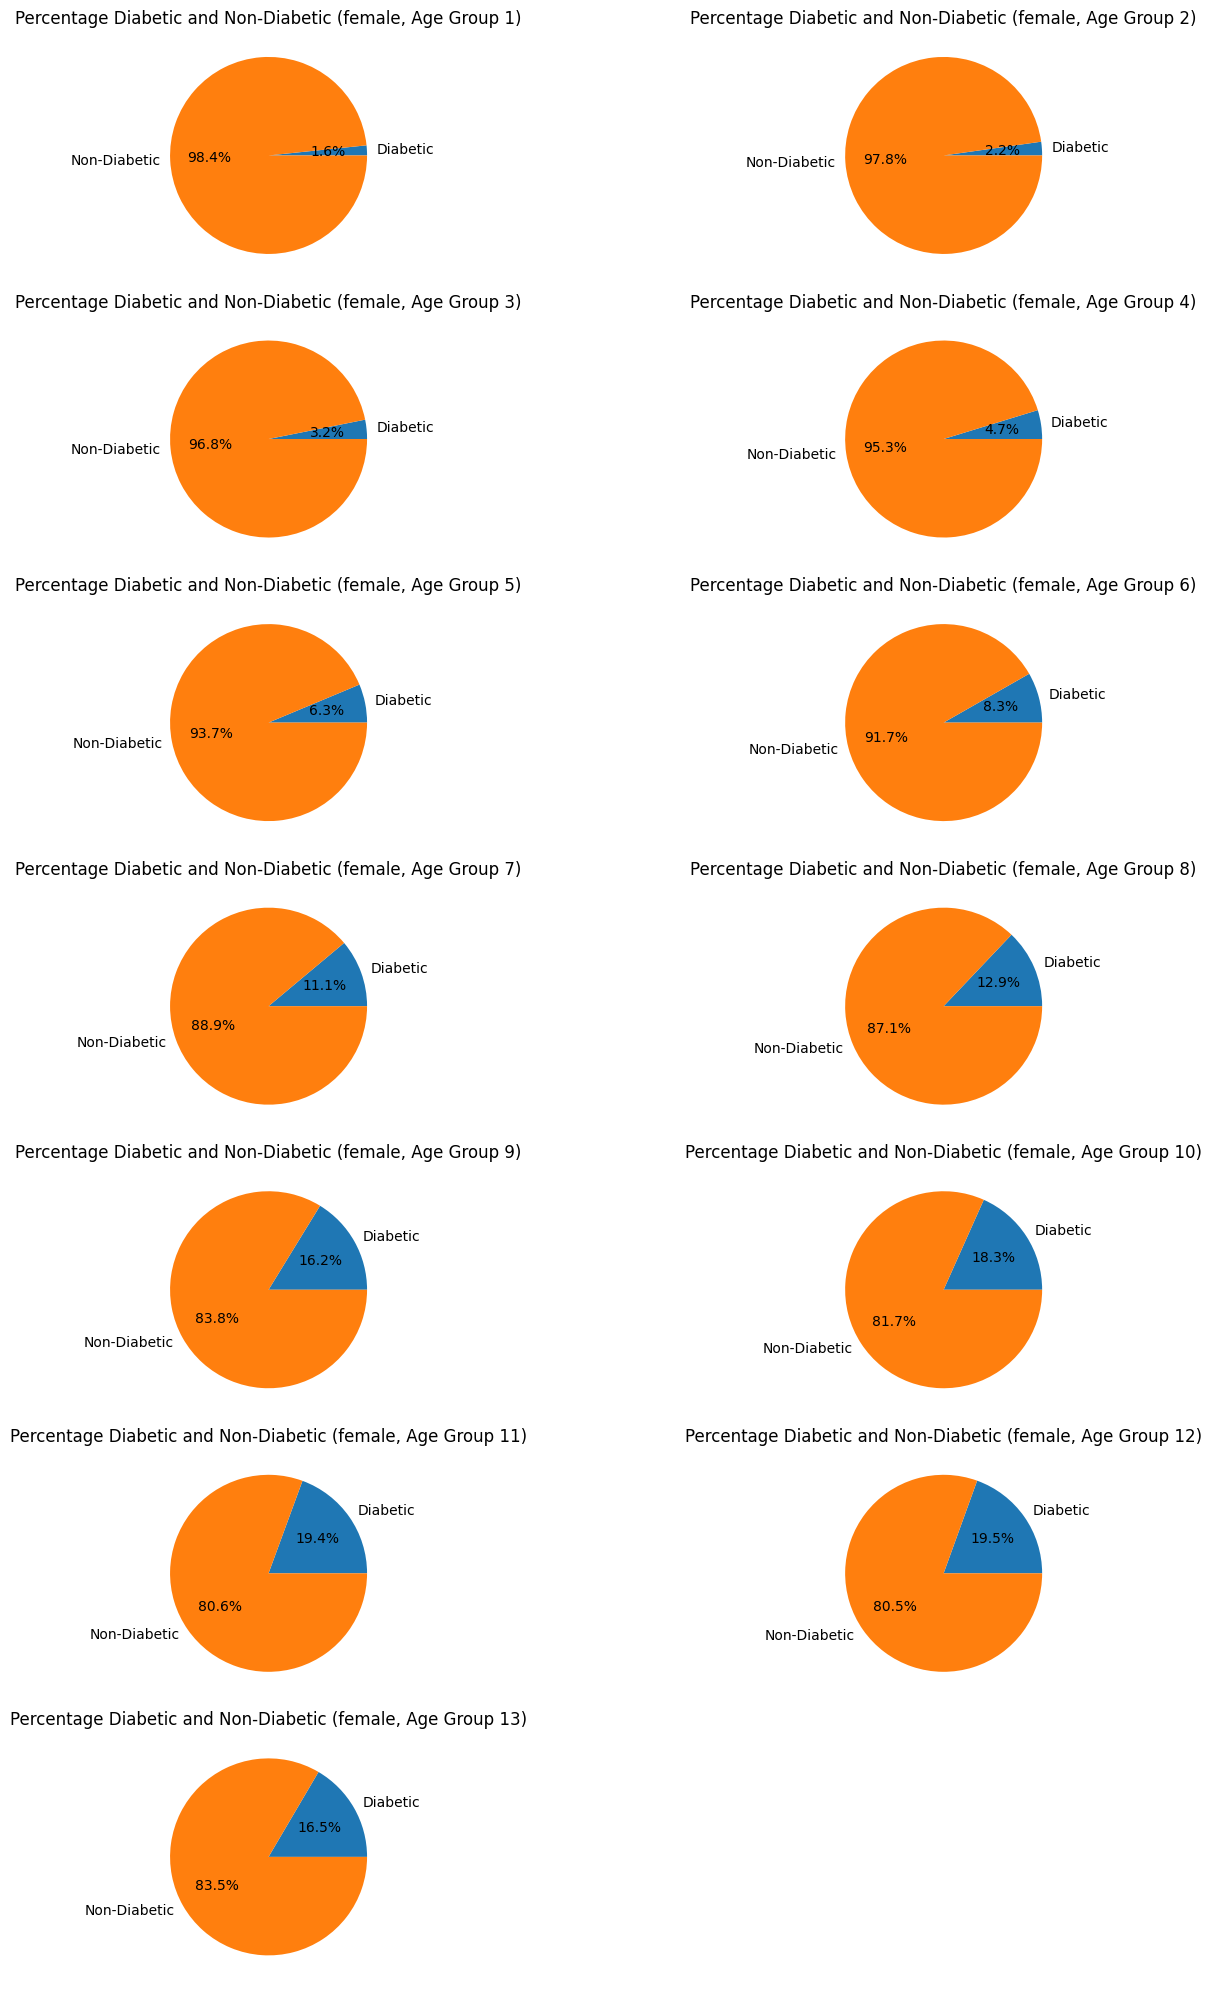

In [22]:
# percentage of diabetics and nondiabetics for female in range of all ages

plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = data[(data['Sex'] == 0) & (data['Age'] == age)]
    total_female = len(df_female)
    diabetic_female = len(df_female[df_female['Diabetes'] == 1])
    non_diabetic_female = len(df_female[df_female['Diabetes'] == 0])
    plt.pie([diabetic_female, non_diabetic_female], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
    plt.title(f'Percentage Diabetic and Non-Diabetic (female, Age Group {age})')
plt.tight_layout()
plt.show()

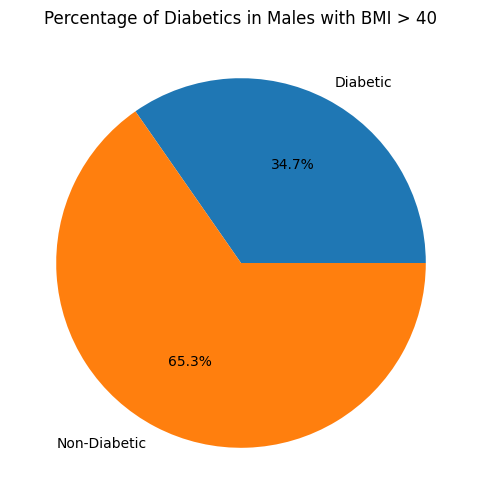

Percentage of diabetics in males with BMI > 40: 34.7%


In [23]:
# Filter data for males with BMI > 40
male_high_bmi = data[(data['Sex'] == 1) & (data['BMI'] > 40)]

# Calculate percentage of diabetics
total_male_high_bmi = len(male_high_bmi)
diabetic_male_high_bmi = len(male_high_bmi[male_high_bmi['Diabetes'] == 1])
percent_diabetic = (diabetic_male_high_bmi / total_male_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with BMI > 40')
plt.show()

print(f"Percentage of diabetics in males with BMI > 40: {percent_diabetic:.1f}%")

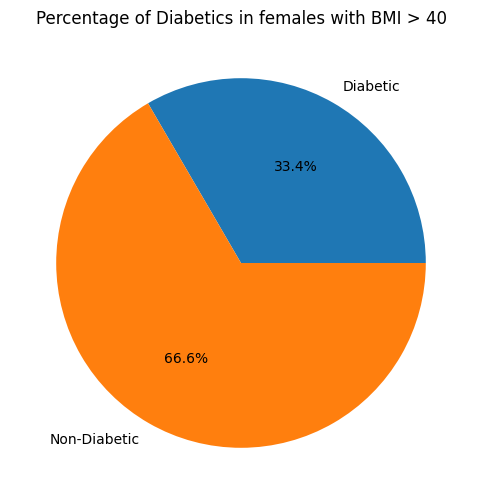

Percentage of diabetics in females with BMI > 40: 34.7%


In [25]:
# Filter data for females with BMI > 40
female_high_bmi = data[(data['Sex'] == 0) & (data['BMI'] > 40)]

# Calculate percentage of diabetics
total_female_high_bmi = len(female_high_bmi)
diabetic_female_high_bmi = len(female_high_bmi[female_high_bmi['Diabetes'] == 1])
fepercent_diabetic = (diabetic_female_high_bmi / total_female_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([fepercent_diabetic, 100 - fepercent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in females with BMI > 40')
plt.show()

print(f"Percentage of diabetics in females with BMI > 40: {percent_diabetic:.1f}%")

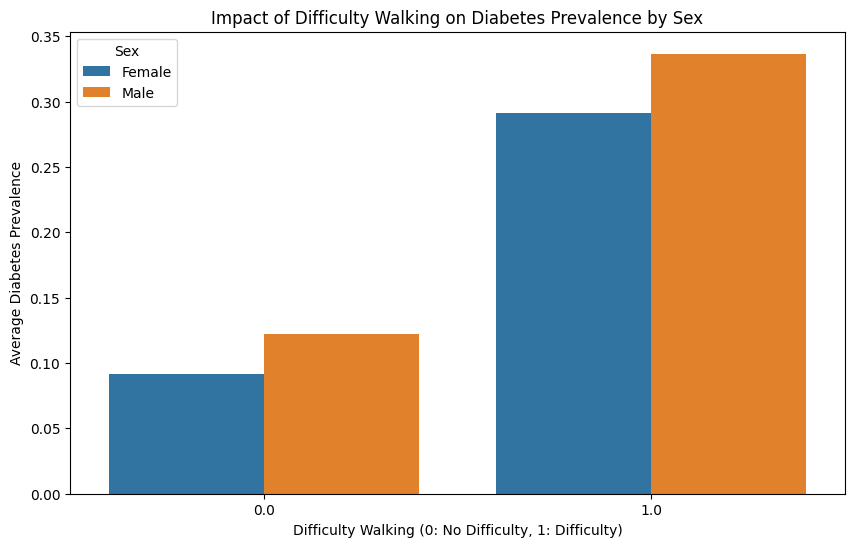

In [26]:
# Group data by Sex and DiffWalk, calculate mean Diabetes
grouped_data = data.groupby(['Sex', 'DiffWalk'])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})


# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='DiffWalk', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('Difficulty Walking (0: No Difficulty, 1: Difficulty)')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Difficulty Walking on Diabetes Prevalence by Sex')
plt.show()

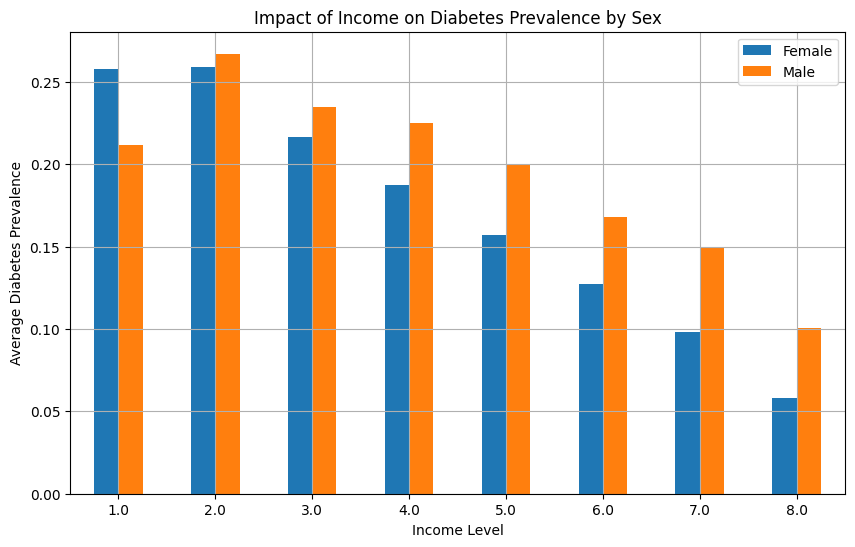

In [27]:
# the percent impact of income  in  diabetic for male and female
# Group data by income and sex, and calculate the mean diabetes prevalence
income_diabetes_by_sex = data.groupby(['Income', 'Sex'])['Diabetes'].mean().unstack()


# Plot the bar chart
income_diabetes_by_sex.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Income Level')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Income on Diabetes Prevalence by Sex')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male'])
plt.grid(True)
plt.show()

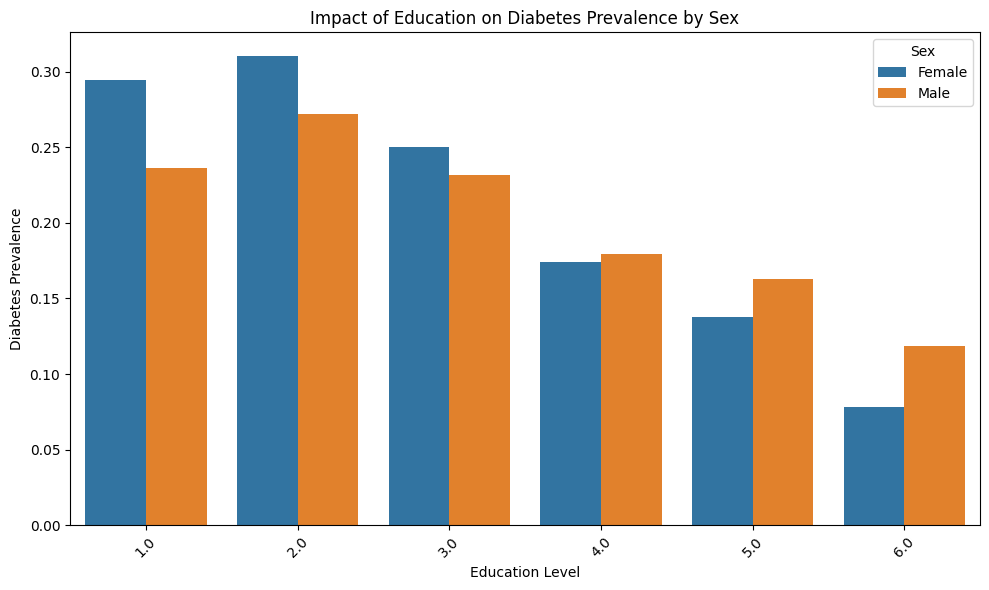

In [28]:
# the percent impact of education  in  diabetic for male and female
# Group data by education level and sex, and calculate the mean diabetes prevalence
education_diabetes = data.groupby(['Education', 'Sex'])['Diabetes'].mean().reset_index()

# Map sex values to labels
education_diabetes['Sex'] = education_diabetes['Sex'].map({0: 'Female', 1: 'Male'})


# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Diabetes', hue='Sex', data=education_diabetes)
plt.xlabel('Education Level')
plt.ylabel('Diabetes Prevalence')
plt.title('Impact of Education on Diabetes Prevalence by Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='upper right')
plt.tight_layout()
plt.show()

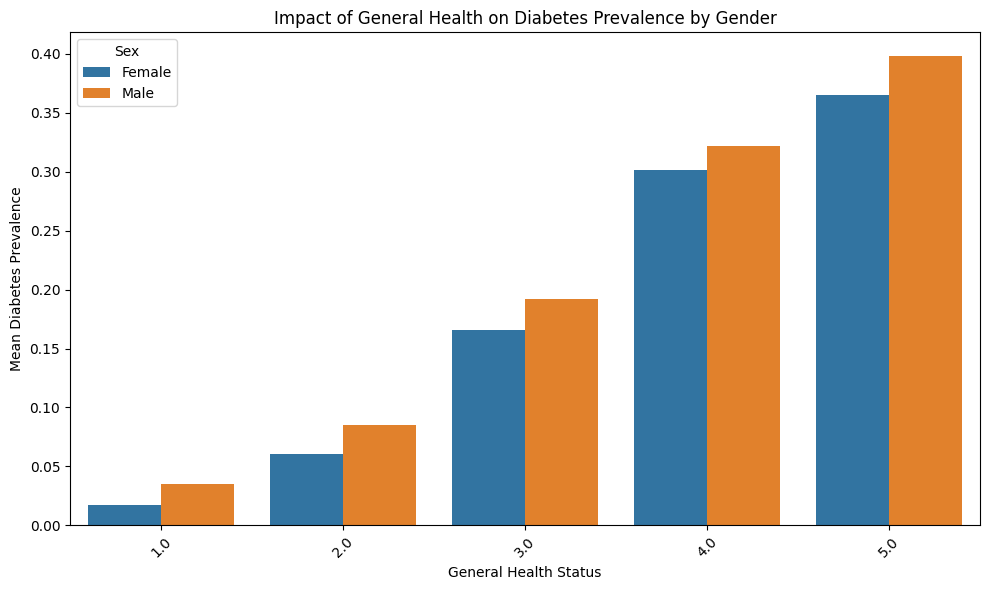

In [29]:
# the percent impact of genhlth  in  diabetic for male and female
# Group data by gender and general health, then calculate mean diabetes prevalence
grouped_data = data.groupby(['Sex', 'GenHlth'])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='GenHlth', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('General Health Status')
plt.ylabel('Mean Diabetes Prevalence')
plt.title('Impact of General Health on Diabetes Prevalence by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

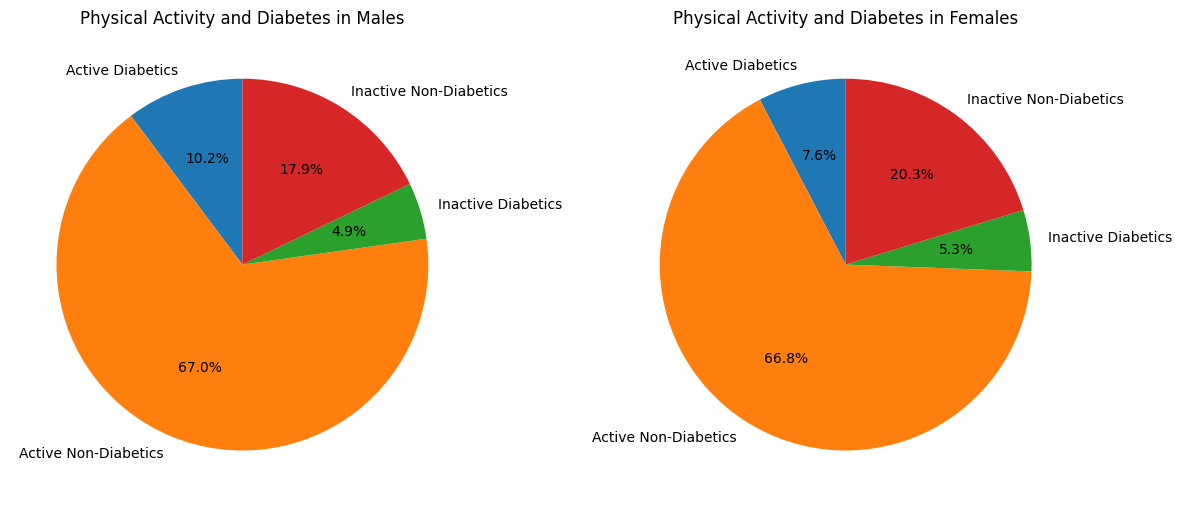

In [30]:
# the percent impact of PhysActivity  in  diabetic for male and female

male_data = data[data['Sex'] == 1]
female_data = data[data['Sex'] == 0]

# Calculate the percentage of diabetics and non-diabetics based on physical activity for males
male_active_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 1)].shape[0]
male_active_non_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 0)].shape[0]
male_inactive_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 1)].shape[0]
male_inactive_non_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 0)].shape[0]

# Calculate the percentage of diabetics and non-diabetics based on physical activity for females
female_active_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 1)].shape[0]
female_active_non_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 0)].shape[0]
female_inactive_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 1)].shape[0]
female_inactive_non_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 0)].shape[0]

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Male pie chart
axes[0].pie([male_active_diabetics, male_active_non_diabetics, male_inactive_diabetics, male_inactive_non_diabetics],
            labels=['Active Diabetics', 'Active Non-Diabetics', 'Inactive Diabetics', 'Inactive Non-Diabetics'],
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('Physical Activity and Diabetes in Males')

# Female pie chart
axes[1].pie([female_active_diabetics, female_active_non_diabetics, female_inactive_diabetics, female_inactive_non_diabetics],
            labels=['Active Diabetics', 'Active Non-Diabetics', 'Inactive Diabetics', 'Inactive Non-Diabetics'],
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Physical Activity and Diabetes in Females')

plt.tight_layout()
plt.show()

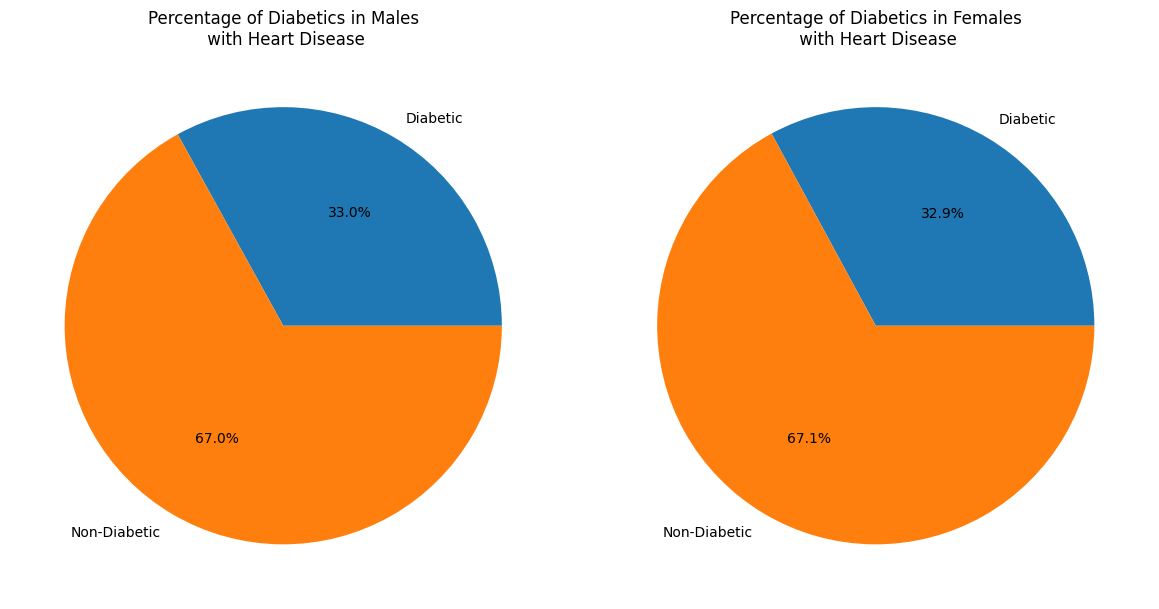

Percentage of diabetics in males with heart disease: 33.0%
Percentage of diabetics in males without heart disease: 12.7%
Percentage of diabetics in females with heart disease: 32.9%
Percentage of diabetics in females without heart disease: 11.4%


In [34]:
#the percent impact of   HeartDiseaseorAttack in diabetic for male and female

male_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 1)]
male_no_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 0)]
female_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 1)]
female_no_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 0)]

# Calculate percentages of diabetics for each group
male_hd_diabetic_percent = (male_heart_disease['Diabetes'].sum() / len(male_heart_disease)) * 100
male_nohd_diabetic_percent = (male_no_heart_disease['Diabetes'].sum() / len(male_no_heart_disease)) * 100
female_hd_diabetic_percent = (female_heart_disease['Diabetes'].sum() / len(female_heart_disease)) * 100
female_nohd_diabetic_percent = (female_no_heart_disease['Diabetes'].sum() / len(female_no_heart_disease)) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_hd_diabetic_percent, 100 - male_hd_diabetic_percent], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males\n with Heart Disease')

plt.subplot(1, 2, 2)
plt.pie([female_hd_diabetic_percent, 100 - female_hd_diabetic_percent], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females\n with Heart Disease')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with heart disease: {male_hd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in males without heart disease: {male_nohd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in females with heart disease: {female_hd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in females without heart disease: {female_nohd_diabetic_percent:.1f}%")

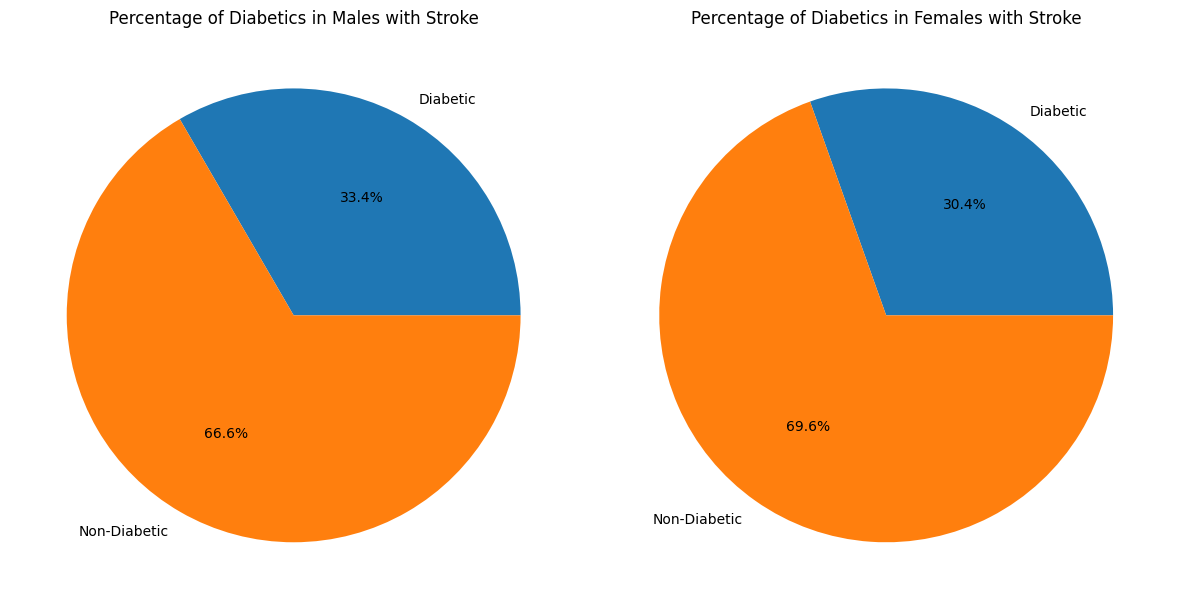

Percentage of diabetics in males with stroke: 33.4%
Percentage of diabetics in females with stroke: 30.4%


In [35]:
# the percent impact of Stroke  in diabetic for male and female
# Filter data for males and females with stroke
male_stroke = data[(data['Sex'] == 1) & (data['Stroke'] == 1)]
female_stroke = data[(data['Sex'] == 0) & (data['Stroke'] == 1)]

# Calculate percentage of diabetics for males with stroke
total_male_stroke = len(male_stroke)
diabetic_male_stroke = len(male_stroke[male_stroke['Diabetes'] == 1])
percent_diabetic_male_stroke = (diabetic_male_stroke / total_male_stroke) * 100

# Calculate percentage of diabetics for females with stroke
total_female_stroke = len(female_stroke)
diabetic_female_stroke = len(female_stroke[female_stroke['Diabetes'] == 1])
percent_diabetic_female_stroke = (diabetic_female_stroke / total_female_stroke) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([percent_diabetic_male_stroke, 100 - percent_diabetic_male_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with Stroke')

plt.subplot(1, 2, 2)
plt.pie([percent_diabetic_female_stroke, 100 - percent_diabetic_female_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with Stroke')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with stroke: {percent_diabetic_male_stroke:.1f}%")
print(f"Percentage of diabetics in females with stroke: {percent_diabetic_female_stroke:.1f}%")

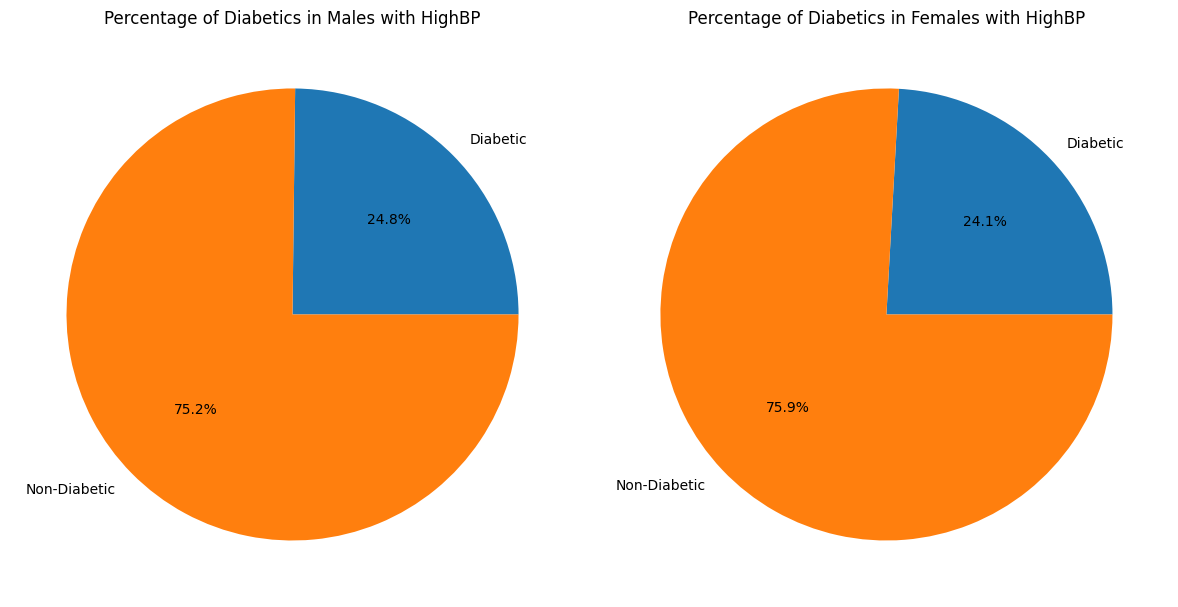

Percentage of diabetics in males with HighBP: 24.8%
Percentage of diabetics in females with HighBP: 24.1%


In [36]:
#the percent impact of HighBP  in  diabetic for male and female
male_highbp = data[(data['Sex'] == 1) & (data['HighBP'] == 1)]
female_highbp = data[(data['Sex'] == 0) & (data['HighBP'] == 1)]

# Calculate percentage of diabetics for males with HighBP
total_male_highbp = len(male_highbp)
diabetic_male_highbp = len(male_highbp[male_highbp['Diabetes'] == 1])
male_percent_diabetic = (diabetic_male_highbp / total_male_highbp) * 100

# Calculate percentage of diabetics for females with HighBP
total_female_highbp = len(female_highbp)
diabetic_female_highbp = len(female_highbp[female_highbp['Diabetes'] == 1])
female_percent_diabetic = (diabetic_female_highbp / total_female_highbp) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_percent_diabetic, 100 - male_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with HighBP')

plt.subplot(1, 2, 2)
plt.pie([female_percent_diabetic, 100 - female_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with HighBP')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with HighBP: {male_percent_diabetic:.1f}%")
print(f"Percentage of diabetics in females with HighBP: {female_percent_diabetic:.1f}%")

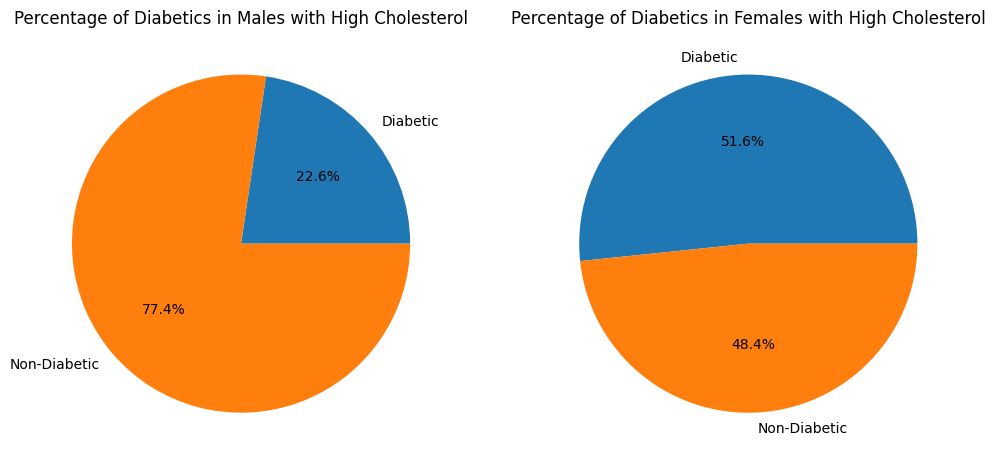

In [37]:
# Filter data for males and females with and without HighChol
male_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 1)]
male_no_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 0)]
female_highchol = df_5050[(data['Sex'] == 0) & (data['HighChol'] == 1)]
female_no_highchol = df_5050[(data['Sex'] == 0) & (data['HighChol'] == 0)]

# Calculate percentages of diabetics
male_highchol_diabetic_percent = (len(male_highchol[male_highchol['Diabetes_binary'] == 1]) / len(male_highchol)) * 100
male_no_highchol_diabetic_percent = (len(male_no_highchol[male_no_highchol['Diabetes_binary'] == 1]) / len(male_no_highchol)) * 100
female_highchol_diabetic_percent = (len(female_highchol[female_highchol['Diabetes_binary'] == 1]) / len(female_highchol)) * 100
female_no_highchol_diabetic_percent = (len(female_no_highchol[female_no_highchol['Diabetes_binary'] == 1]) / len(female_no_highchol)) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_highchol_diabetic_percent, 100 - male_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with High Cholesterol')

plt.subplot(1, 2, 2)
plt.pie([female_highchol_diabetic_percent, 100 - female_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with High Cholesterol')

plt.show()

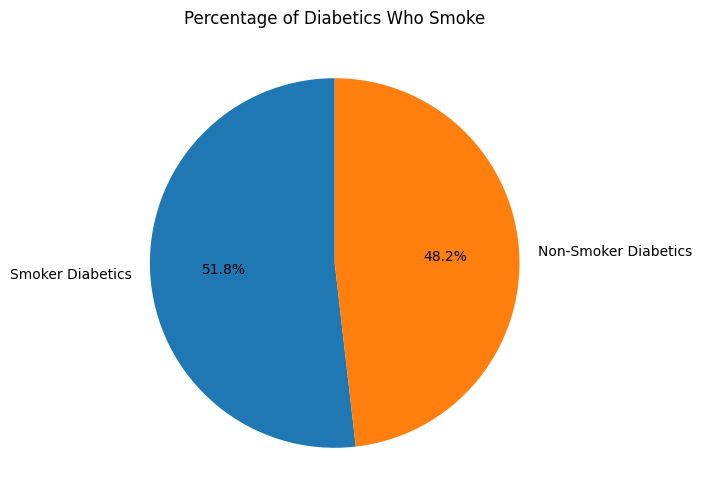

In [38]:
# the percent impact of smoke in diabetic
smoker_diabetics = data[(data['Diabetes_binary'] == 1) & (data['Smoker'] == 1)].shape[0]
non_smoker_diabetics = data[(data['Diabetes_binary'] == 1) & (data['Smoker'] == 0)].shape[0]

labels = ['Smoker Diabetics', 'Non-Smoker Diabetics']
sizes = [smoker_diabetics, non_smoker_diabetics]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Diabetics Who Smoke')
plt.show()

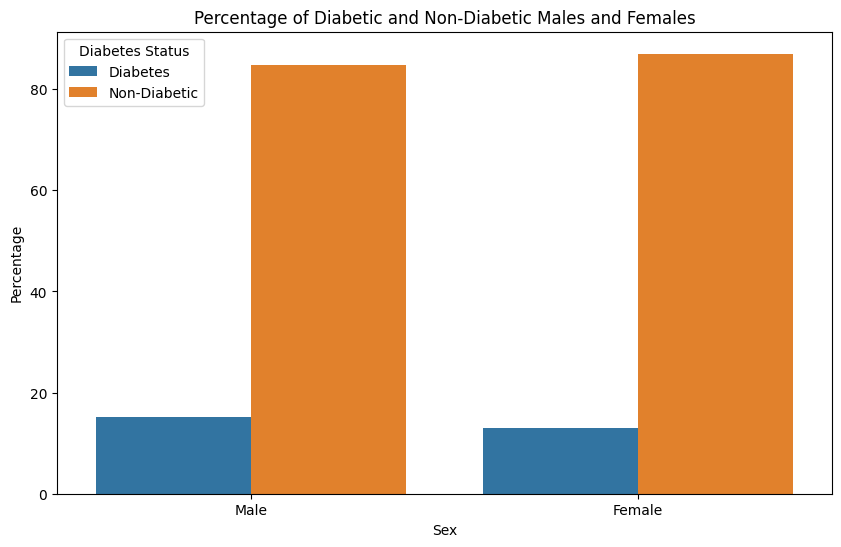

In [40]:
# Count diabetic and non-diabetic males and females
male_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 1)].shape[0]
male_non_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 0)].shape[0]
female_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 1)].shape[0]
female_non_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 0)].shape[0]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'Sex': ['Male', 'Male', 'Female', 'Female'],
    'Diabetes Status': ['Diabetes', 'Non-Diabetic', 'Diabetes', 'Non-Diabetic'],
    'Count': [male_diabetic, male_non_diabetic, female_diabetic, female_non_diabetic]
})

# Calculate percentages
df['Percentage'] = df['Count'] / df.groupby('Sex')['Count'].transform('sum') * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Percentage', hue='Diabetes Status', data=df)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetic and Non-Diabetic Males and Females')
plt.show()

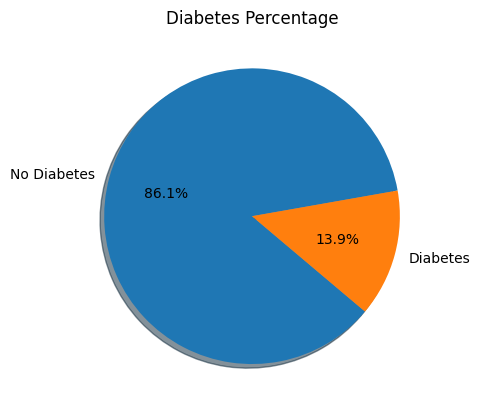

In [43]:
labels = ['No Diabetes', 'Diabetes']

fig, ax = plt.subplots()
ax.pie(data['Diabetes'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=10)
ax.set_title('Diabetes Percentage')
plt.show()

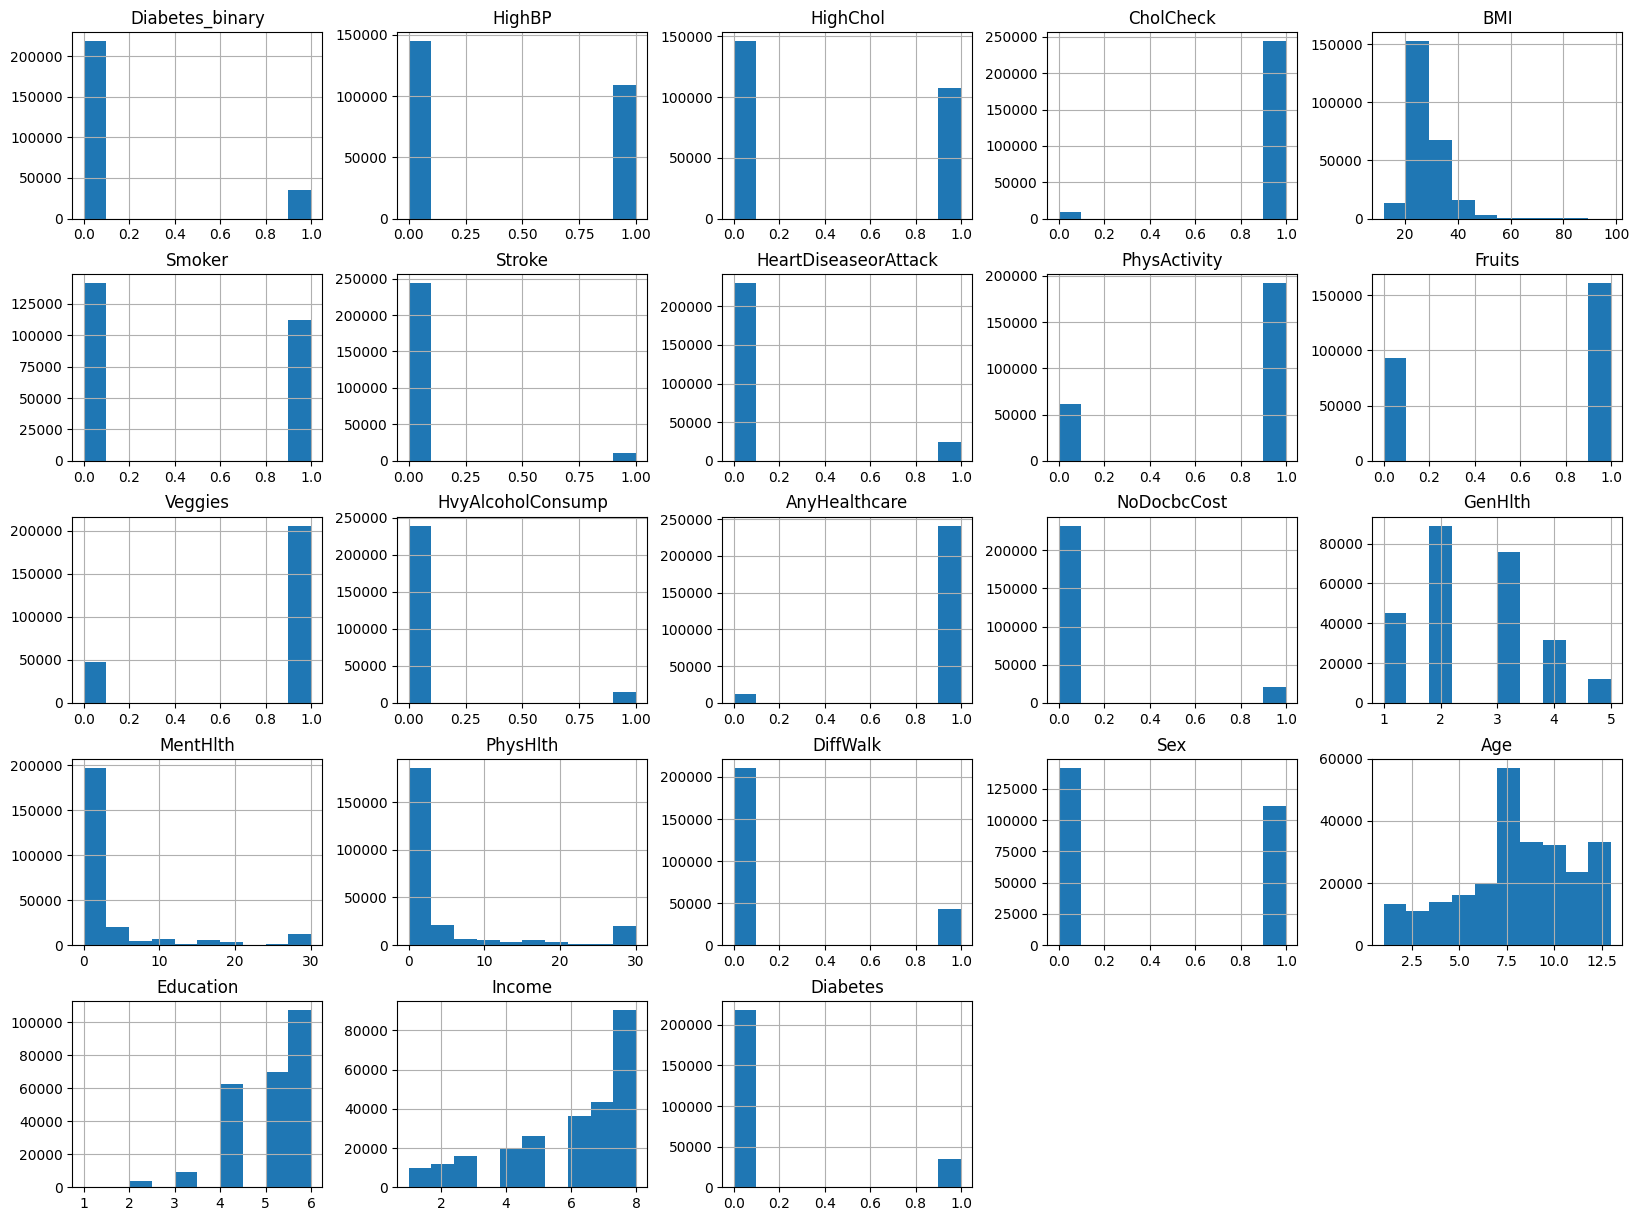

In [45]:
data.hist(figsize=(20,15))
plt.show()

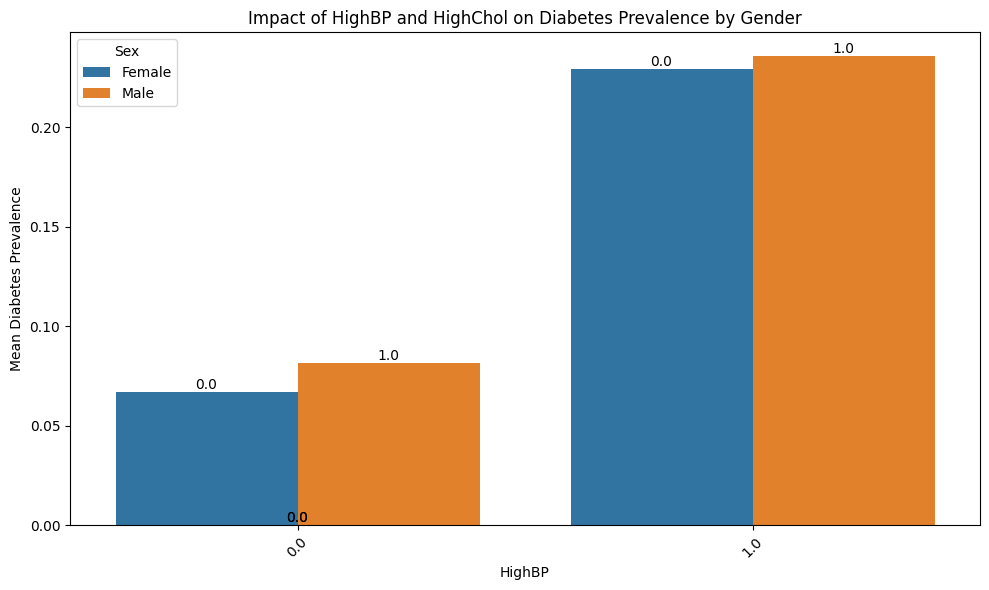

In [47]:
# prompt: show me if two features grouped how they will impact on diabetes for male and female

# Choose two features to analyze
feature1 = 'HighBP'  # Example feature 1
feature2 = 'HighChol'  # Example feature 2

# Group data by Sex, feature1, and feature2, then calculate mean Diabetes
grouped_data = data.groupby(['Sex', feature1, feature2])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature1, y='Diabetes', hue='Sex', data=grouped_data, ci=None)
plt.xlabel(feature1)
plt.ylabel('Mean Diabetes Prevalence')
plt.title(f'Impact of {feature1} and {feature2} on Diabetes Prevalence by Gender')

# Add annotations for feature2 values
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    group_idx = i // len(grouped_data[feature1].unique())
    feature2_value = grouped_data[feature2].unique()[group_idx % len(grouped_data[feature2].unique())]
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(feature2_value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion and Future Work
In this notebook, we explored the diabetes health indicators dataset and analyst the related features co-related to Diabetes. These will help to built a predictive model to identify individuals at risk of diabetes. The Random Forest Classifier provided us with a reasonable accuracy. However, there is always room for improvement.
